In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [130]:
dataFrame = pd.read_csv("cardio_train.csv", sep=';')

In [131]:
dataFrame.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,999,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65.0,140,90,3,1,0,0,1,1


In [132]:
# Yaşları gerçek yaşa (yıl) dönüştürme
dataFrame['age'] = dataFrame['age'] // 365

In [133]:
dataFrame.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64,1,155,62.0,120,80,1,1,0,0,1,0
5,995,57,1,164,61.0,100,70,1,1,0,0,1,0
6,996,49,1,162,72.0,100,70,1,1,0,0,1,0
7,997,61,1,161,93.0,140,90,2,1,0,0,1,1
8,999,58,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,61,1,158,65.0,140,90,3,1,0,0,1,1


In [134]:
print(dataFrame.shape)

(69301, 13)


In [135]:
dataFrame.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [136]:
dataFrame = dataFrame.dropna(subset=["id"])

In [137]:
dataFrame.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

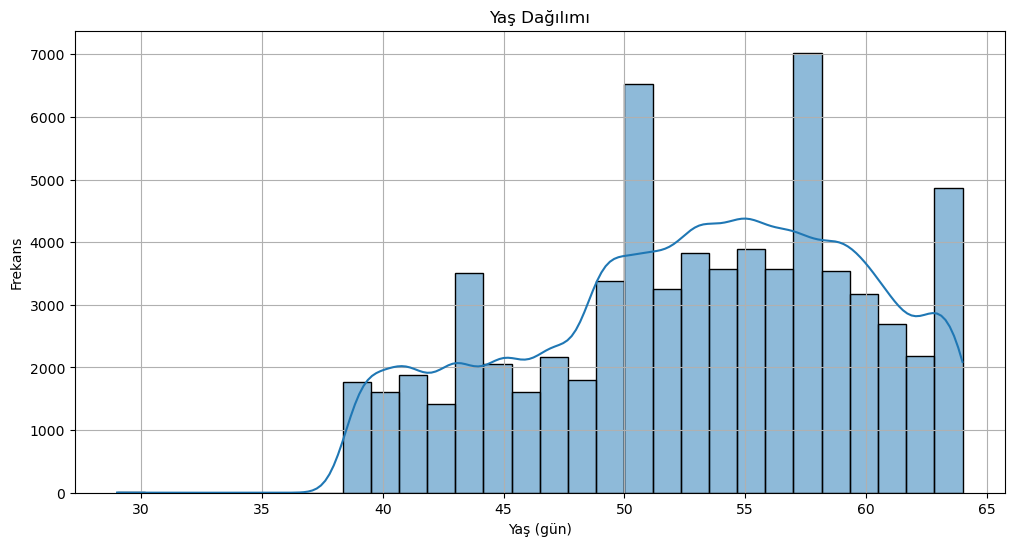

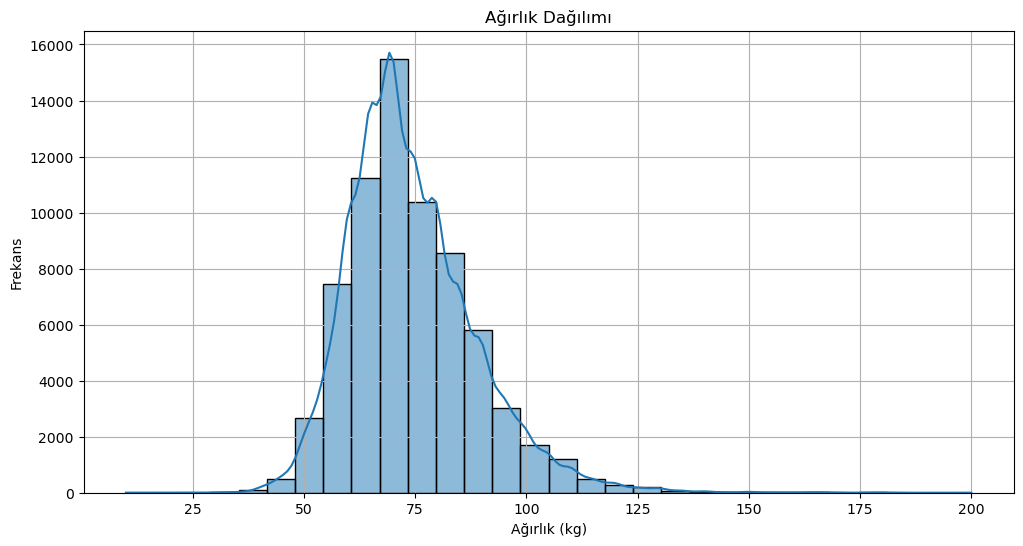

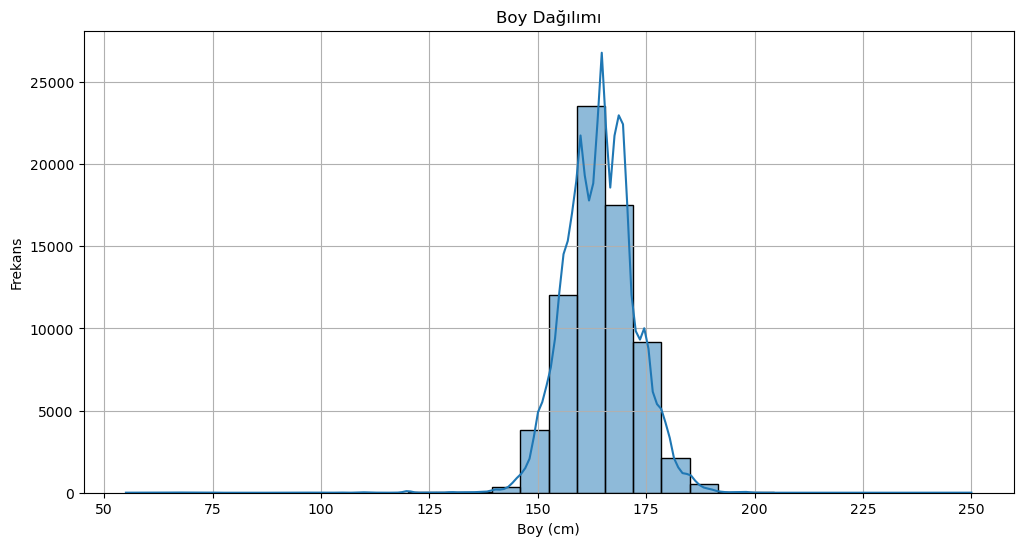

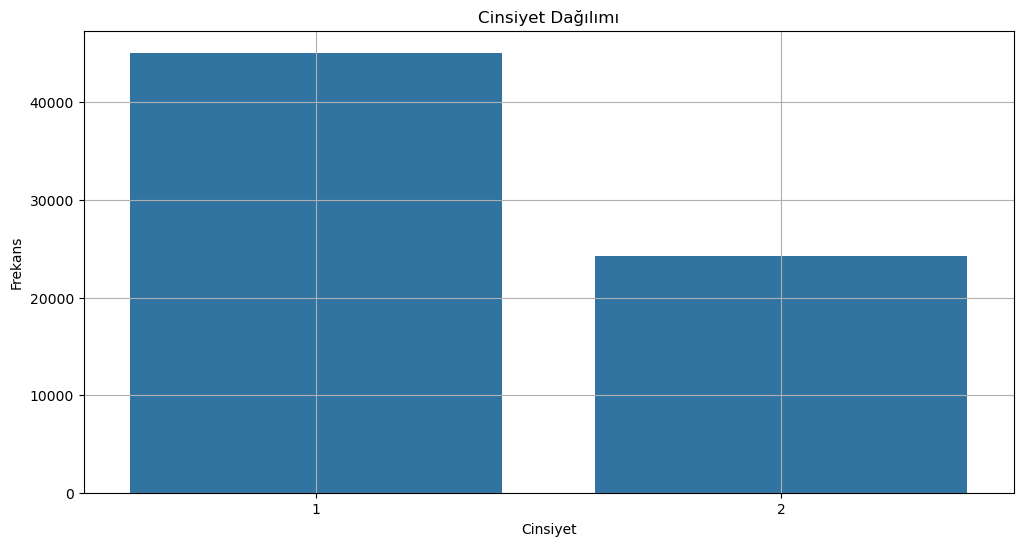

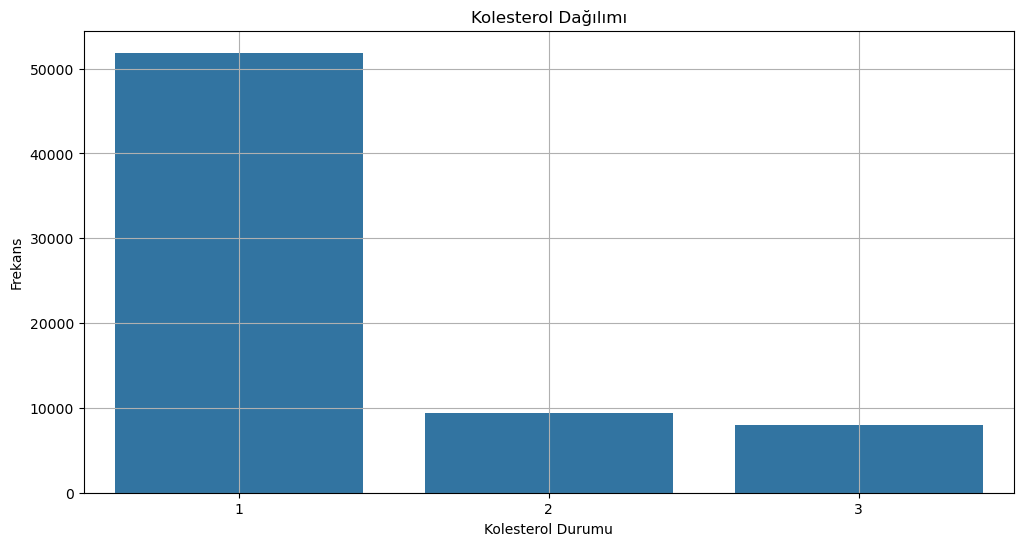

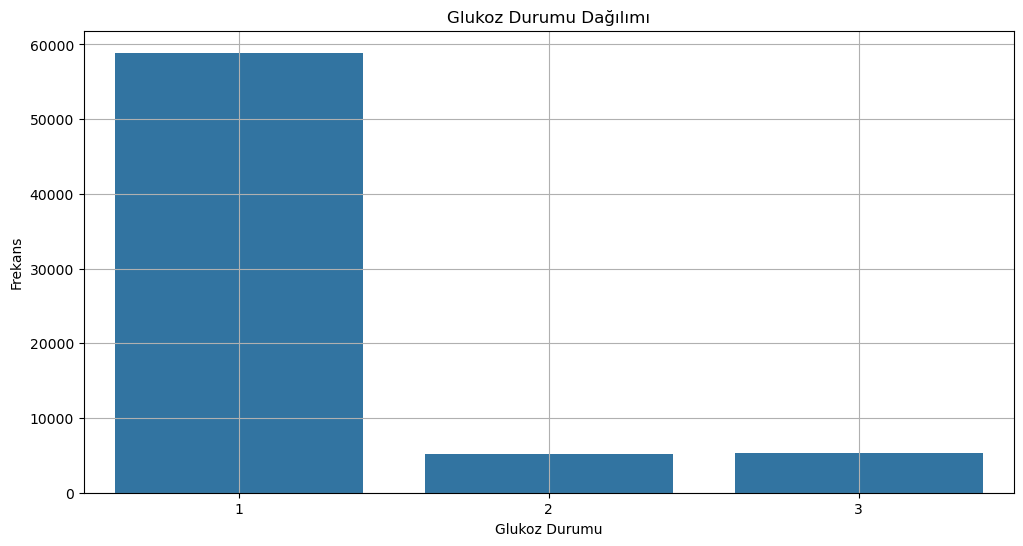

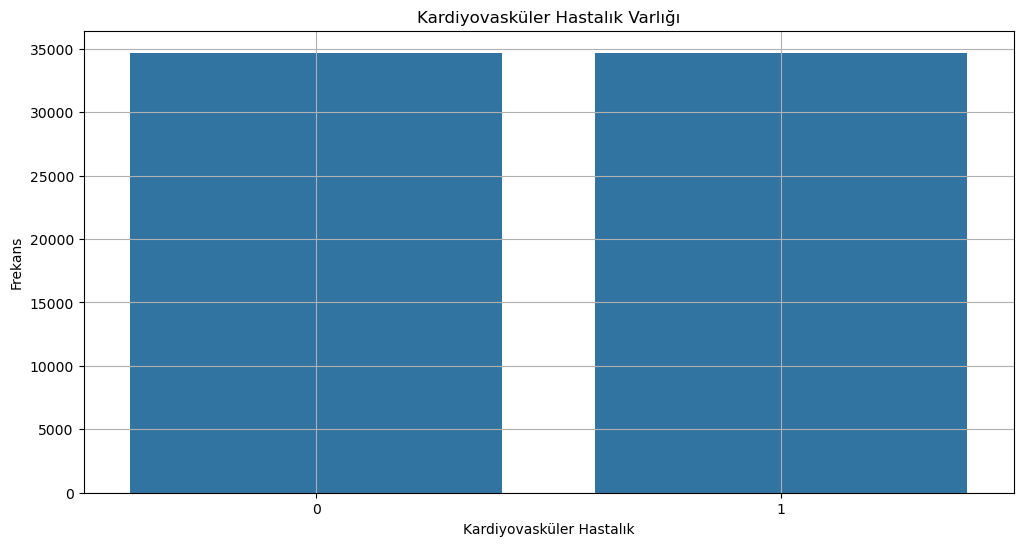

In [138]:
plt.figure(figsize=(12, 6))
sns.histplot(dataFrame['age'], bins=30, kde=True)
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş (gün)')
plt.ylabel('Frekans')
plt.grid()
plt.savefig('hastalik/yas_grafik.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(dataFrame['weight'], bins=30, kde=True)
plt.title('Ağırlık Dağılımı')
plt.xlabel('Ağırlık (kg)')
plt.ylabel('Frekans')
plt.grid()
plt.savefig('hastalik/Agirlik_grafik.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(dataFrame['height'], bins=30, kde=True)
plt.title('Boy Dağılımı')
plt.xlabel('Boy (cm)')
plt.ylabel('Frekans')
plt.grid()
plt.savefig('hastalik/boy_grafik.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='gender', data=dataFrame)
plt.title('Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Frekans')
plt.grid()
plt.savefig('hastalik/cinsiyet_grafik.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='cholesterol', data=dataFrame)
plt.title('Kolesterol Dağılımı')
plt.xlabel('Kolesterol Durumu')
plt.ylabel('Frekans')
plt.grid()
plt.savefig('hastalik/kolesterol_grafik.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='gluc', data=dataFrame)
plt.title('Glukoz Durumu Dağılımı')
plt.xlabel('Glukoz Durumu')
plt.ylabel('Frekans')
plt.grid()
plt.savefig('hastalik/glukoz_grafik.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='cardio', data=dataFrame)
plt.title('Kardiyovasküler Hastalık Varlığı')
plt.xlabel('Kardiyovasküler Hastalık')
plt.ylabel('Frekans')
plt.grid()
plt.savefig('hastalik/kardiyovaskuler_hastalik_grafik.png', dpi=300)
plt.show()

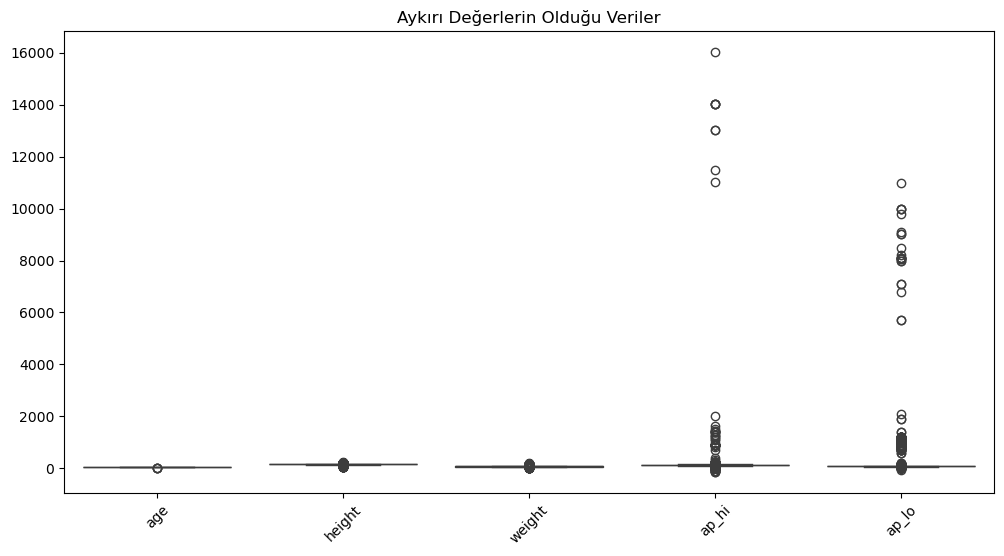

In [139]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataFrame[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
plt.title('Aykırı Değerlerin Olduğu Veriler')
plt.xticks(rotation=45)
plt.savefig('hastalik/aykiri_degerler_grafik.png', dpi=300)
plt.show()

In [140]:
Q1 = dataFrame[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']].quantile(0.25)
Q3 = dataFrame[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']].quantile(0.75)
IQR = Q3 - Q1

outliers_condition = (dataFrame[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']] < (Q1 - 1.5 * IQR)) | (dataFrame[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']] > (Q3 + 1.5 * IQR))

initial_count = dataFrame.shape[0]

dataFrame = dataFrame[~outliers_condition.any(axis=1)]

final_count = dataFrame.shape[0]

removed_count = initial_count - final_count

print(f"Kaldırılan toplam aykırı değer sayısı: {removed_count}")

outlier_counts = outliers_condition.sum()
print("Her sütundaki aykırı değer sayıları:")
print(outlier_counts)

Kaldırılan toplam aykırı değer sayısı: 16422
Her sütundaki aykırı değer sayıları:
age                4
height           515
weight          1802
ap_hi           1419
ap_lo           4584
cholesterol        0
gluc           10416
dtype: int64


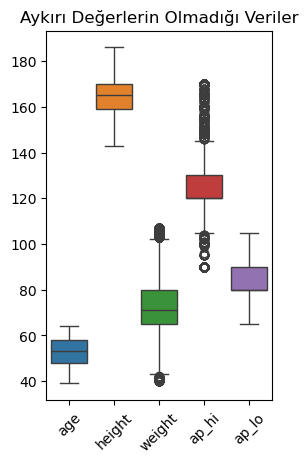

In [141]:
plt.subplot(1, 2, 1)
sns.boxplot(data=dataFrame[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])
plt.title('Aykırı Değerlerin Olmadığı Veriler')
plt.xticks(rotation=45)
plt.savefig('hastalik/aykiri_degerlerin_olmadigi_veriler_grafik.png', dpi=300)

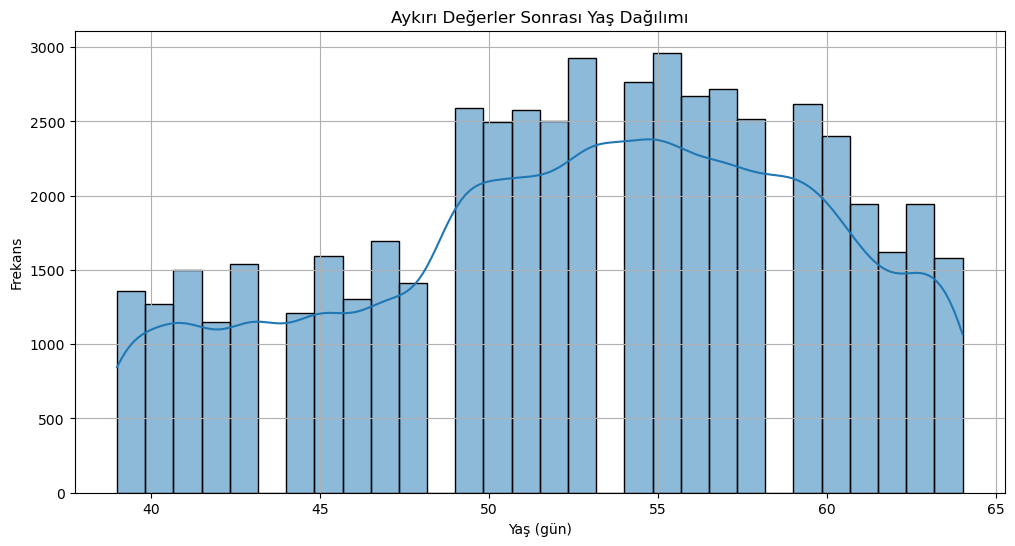

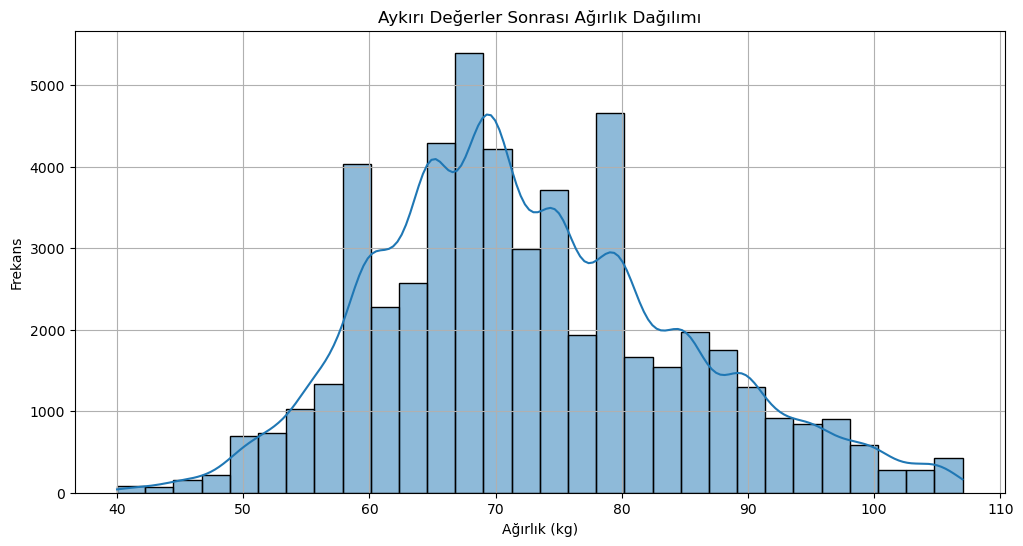

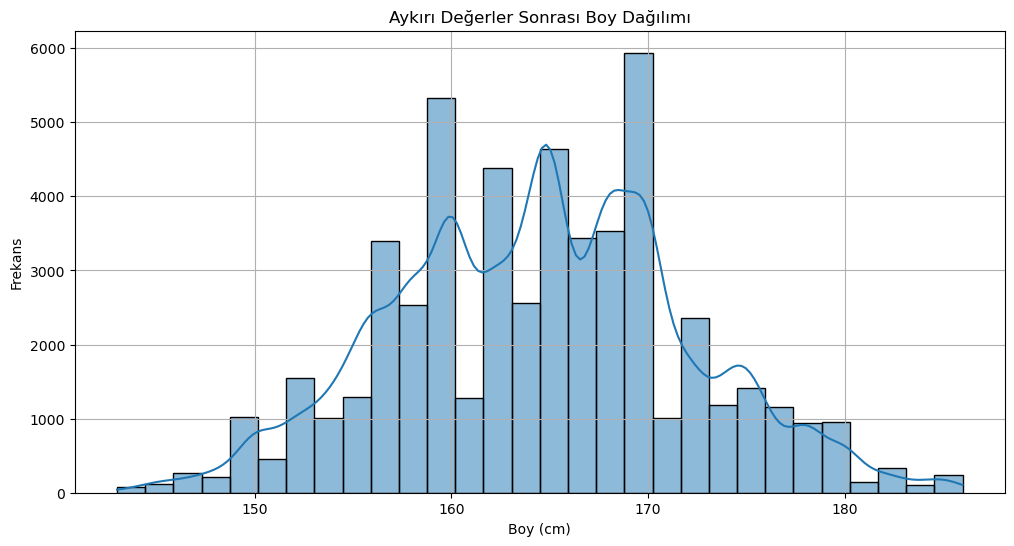

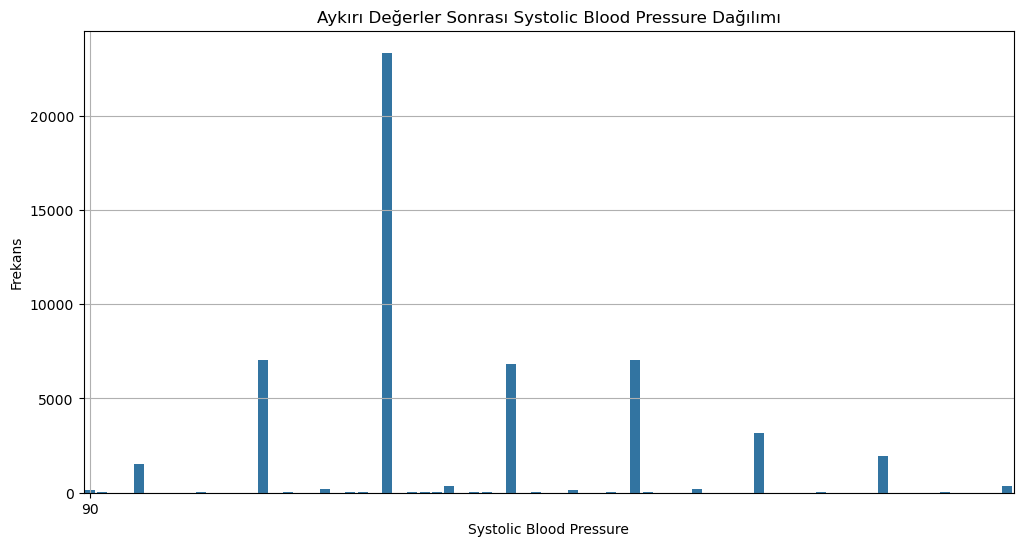

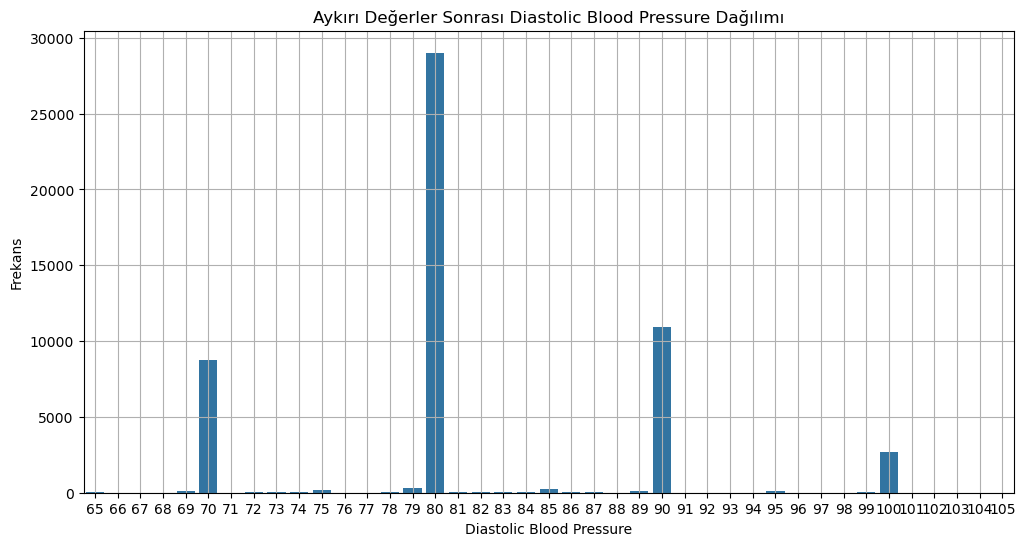

In [142]:
plt.figure(figsize=(12, 6))
sns.histplot(dataFrame['age'], bins=30, kde=True)
plt.title('Aykırı Değerler Sonrası Yaş Dağılımı')
plt.xlabel('Yaş (gün)')
plt.ylabel('Frekans')
plt.grid()
plt.savefig('hastalik/aykiri_degerler_yas_grafik.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(dataFrame['weight'], bins=30, kde=True)
plt.title('Aykırı Değerler Sonrası Ağırlık Dağılımı')
plt.xlabel('Ağırlık (kg)')
plt.ylabel('Frekans')
plt.grid()
plt.savefig('hastalik/aykiri_degerler_agirlik_grafik.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(dataFrame['height'], bins=30, kde=True)
plt.title('Aykırı Değerler Sonrası Boy Dağılımı')
plt.xlabel('Boy (cm)')
plt.ylabel('Frekans')
plt.grid()
plt.savefig('hastalik/aykiri_degerler_boy_grafik.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 6))
# Systolic Blood Pressure (ap_hi) dağılımı
sns.countplot(x='ap_hi', data=dataFrame)
plt.title('Aykırı Değerler Sonrası Systolic Blood Pressure Dağılımı')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frekans')
plt.grid()
current_values = plt.gca().get_xticks()
plt.gca().set_xticks([int(y) for y in current_values if y % 100 == 0])
plt.savefig('hastalik/aykiri_degerler_sonrası_systolic_blood_pressure_dagilimi.png', dpi=300)
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='ap_lo', data=dataFrame)
plt.title('Aykırı Değerler Sonrası Diastolic Blood Pressure Dağılımı')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Frekans')
plt.grid()
plt.savefig('hastalik/aykiri_degerler_sonrası_diastolic_blood_pressure_dağilimi.png', dpi=300)
plt.show()

In [143]:
y = dataFrame["cardio"].values
x = dataFrame.drop("cardio", axis = 1).values

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=15)

In [145]:
dataFrame

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,989,40,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64,1,155,62.0,120,80,1,1,0,0,1,0
5,995,57,1,164,61.0,100,70,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69293,99990,51,1,161,56.0,170,90,1,1,0,0,1,1
69294,99991,53,1,172,70.0,130,90,1,1,0,0,1,1
69295,99992,57,1,165,80.0,150,80,1,1,0,0,1,1
69296,99993,52,2,168,76.0,120,80,1,1,1,0,1,0


In [146]:
scaler = MinMaxScaler()

In [147]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [148]:
x_train.shape

(37015, 12)

In [149]:
print(x_train)

[[0.57247753 0.16       0.         ... 0.         0.         1.        ]
 [0.05280275 0.32       1.         ... 0.         0.         1.        ]
 [0.02926977 0.76       1.         ... 0.         0.         1.        ]
 ...
 [0.05082315 0.68       1.         ... 0.         0.         1.        ]
 [0.15253005 0.68       0.         ... 0.         0.         0.        ]
 [0.14372286 0.24       0.         ... 0.         0.         1.        ]]


In [150]:
x_test.dtype

dtype('float64')

In [151]:
model = lgb.LGBMClassifier()
model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 17484, number of negative: 19531
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 526
[LightGBM] [Info] Number of data points in the train set: 37015, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.472349 -> initscore=-0.110717
[LightGBM] [Info] Start training from score -0.110717


LGBMClassifier()

In [152]:
y_pred = model.predict(x_test)

In [153]:
print("Doğruluk Oranı: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Doğruluk Oranı:  0.736636409480585
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      8177
           1       0.76      0.66      0.71      7687

    accuracy                           0.74     15864
   macro avg       0.74      0.73      0.73     15864
weighted avg       0.74      0.74      0.74     15864

